<font color='purple'>**Jayasurya V**</font> <br>
<font color='purple'>**Domain:Data Science and Buisness Analytics**</font>

 **<center><font color='green'> Task-02 Prediction using Unsupervised ML</font>** 

### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load dataset

In [2]:
dataset=pd.read_csv('E:\GRIP\datasets\Iris.csv')

In [3]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Basic information about data

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [5]:
dataset.shape

(150, 6)

### K-Means Clustering

### what ?
<li>Clustering-> The data is divided into <font color=purple>several group with similar traits</font>
<li>The K-means algorithm defines the centroid of cluster as <font color=purple>the mean value of the points within the cluster</font>

## <font color=red>**How works?**</font>
<li>select the centroid randomly
<li>Find the distance
<li>select the group and find average
<li>After that centroid moved again unless untill when the point can't change
    

In [6]:
from sklearn.cluster import KMeans

In [7]:
x=dataset.iloc[:,[1,2,3,4]].values
x[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

### Choose K value


### <font color='red'>**Elbow method?**</font>
<li>Now I am run k=1 to 10 through looping when my k=1 my wcss is high
<li>which is sudden decrease that is correct and best value of k

### <font color='red'>**WCSS?**</font>
<li>within cluster sum of square
<li>The sum of squares of the distances of each data point in all clusters to their respective centroids.

In [12]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',max_iter=300, n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    

In [13]:
wcss

[680.8244,
 152.36870647733903,
 78.94084142614601,
 57.31787321428571,
 46.56163015873016,
 38.930963049671746,
 34.19068792479663,
 30.063874432733133,
 27.87928787878788,
 26.048202248044355]

### Visualize the Elbow value

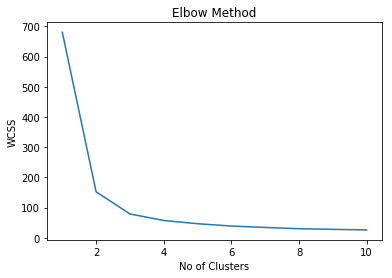

In [14]:
plt.plot(range(1,11),wcss)
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

### Fit the model

In [15]:
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

### Predict

In [16]:
y_pred=kmeans.fit_predict(x)

In [17]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [83]:
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

### Visualize the cluster

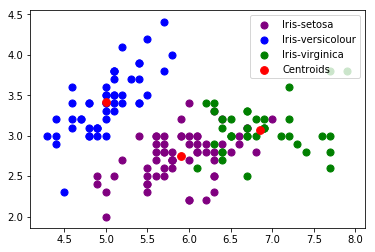

In [78]:
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1],s=50, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1],s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_pred == 2, 0], x[y_pred == 2, 1],s = 50, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],s = 60, c = 'red', label = 'Centroids')
plt.legend(loc='upper right')